# Classification of Lunar Rocks 

In this notebook I have created my own model by adding some dropouts to reduce the overfitting and also I have changed some 
parameters of FC layers

In [2]:
import os
print("Current dir: "+os.getcwd())
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Model
from keras import layers
import keras
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from keras.layers import Dropout,Conv2D,MaxPooling2D


Current dir: C:\Users\user


In [12]:
n_classes=2
opt='sgd'
in_layer = layers.Input((224,224,3))

conv1 = layers.Conv2D(96, 11, strides=4, activation='relu')(in_layer)
pool1 = layers.MaxPool2D(3, 2)(conv1)
conv2 = layers.Conv2D(256, 5, strides=1, padding='same', activation='relu')(pool1)
pool2 = layers.MaxPool2D(3, 2)(conv2)
conv3 = layers.Conv2D(384, 3, strides=1, padding='same', activation='relu')(pool2)
conv4 = layers.Conv2D(256, 3, strides=1, padding='same', activation='relu')(conv3)
pool3 = layers.MaxPool2D(3, 2)(conv4)
flattened = layers.Flatten()(pool3)
dense1 = layers.Dense(4096, activation='relu')(flattened)
drop1 = layers.Dropout(0.5)(dense1)
dense2 = layers.Dense(4096, activation='relu')(drop1)
drop2 = layers.Dropout(0.5)(dense2)
preds = layers.Dense(n_classes, activation='softmax')(drop2)


model=Model(inputs=in_layer,outputs=preds)                                  # new model's summary
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

I have customized a callback as it will stop the training once the validation accuracy reach to 99%

In [15]:
import os
os.chdir(r'C:\Users\user\Downloads\Dataset\Train Images')
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.9899):
            print('cancelling since validation accuracy has been reached to 90%')
            self.model.stop_training=True
callbacks_3=myCallback()   
os.chdir(r"C:\Users\user\Downloads\Dataset\Train Images")
path=os.getcwd()

from keras.optimizers import sgd
opt='sgd'
model.compile(loss="categorical_crossentropy", optimizer=sgd(lr=0.01),metrics=["accuracy"])
train_gen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2
                            ,fill_mode='nearest',validation_split=0.05)
train_data=train_gen.flow_from_directory(path,target_size=(224,224),batch_size=10,subset='training')
validation_data=train_gen.flow_from_directory(path,target_size=(224,224),batch_size=10,subset='validation')


Found 11400 images belonging to 2 classes.
Found 598 images belonging to 2 classes.


In [16]:
history=model.fit_generator(train_data,epochs=30,validation_data=validation_data,callbacks=[callbacks_3])


Epoch 1/30
1140/1140 [==============================] - 340s 298ms/step - loss: 0.3699 - accuracy: 0.8196 - val_loss: 0.0546 - val_accuracy: 0.9599
Epoch 2/30
1140/1140 [==============================] - 396s 347ms/step - loss: 0.1245 - accuracy: 0.9516 - val_loss: 3.2480e-05 - val_accuracy: 0.9231
Epoch 3/30
1140/1140 [==============================] - 342s 300ms/step - loss: 0.0834 - accuracy: 0.9694 - val_loss: 0.0413 - val_accuracy: 0.9916
cancelling since validation accuracy has been reached to 90%


Saving the Final prediction file on test data

In [18]:
import pandas as pd
import os
print(model.evaluate_generator(validation_data))
from keras.preprocessing import image
import numpy as np
os.chdir(r'C:\Users\user\Downloads\Dataset')
test=pd.read_csv("test.csv")
test_images=test['Image_File'].to_list()
y_pred=[]
os.chdir(r"C:\Users\user\Downloads\Dataset\Test Images")
path=os.getcwd()
for file in test_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_pred.append(model.predict(img))
print(len(y_pred))
y_pred_1=np.array(y_pred)
print(y_pred_1.shape)
y_pred_1=y_pred_1.reshape(7534,2)
y_df_1=pd.DataFrame(y_pred_1)
print(y_df_1.shape)
print(y_df_1.head())
print("Large-->0 small--1")
y_1=y_pred_1.argmax(axis=1)
print(y_1[:10])
y_1=pd.DataFrame(y_1)
submission_1=pd.concat([test,y_1],axis=1)
submission_1.drop(['Class'],axis=1,inplace=True)
submission_1.columns=['Image_File','Class']
submission_1.replace({0:'Large',1:'Small'},inplace=True)
print(submission_1.head())
os.chdir(r"C:\Users\user\Downloads\Dataset\Train Images")
submission_1.to_csv("Lunar10.csv",index=False)

[0.023849111050367355, 0.9882943034172058]
7534
(7534, 1, 2)
(7534, 2)
     0    1
0  0.0  1.0
1  0.0  1.0
2  0.0  1.0
3  0.0  1.0
4  0.0  1.0
Large-->0 small--1
[1 1 1 1 1 1 1 1 1 1]
         Image_File  Class
0    lg 988 (1).png  Small
1   lg 988 (10).png  Small
2  lg 988 (100).png  Small
3  lg 988 (101).png  Small
4  lg 988 (102).png  Small


# Plotting a confusion Matrix on training data

In [19]:
os.chdir(r"C:\Users\user\Downloads\DataSet")
path=os.getcwd()
train=pd.read_csv("train.csv")
train_images=train['Image_File'].to_list()
    
y_pred=[]
for file in train_images:
    path_file=os.path.join(r"C:\Users\user\Downloads\DataSet\TI",file)
    img=image.load_img(path_file,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_pred.append(model.predict(img))
y_pred_np=np.array(y_pred)
y_pred_np=y_pred_np.reshape(11998,2)
y_pred_final=y_pred_np.argmax(axis=1)
train_labels=train['Class']
train_labels.replace({'Large':0,'Small':1},inplace=True)
y=np.array(train_labels)

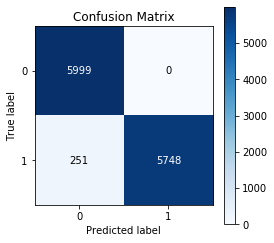

In [21]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y,y_pred_final,figsize=(4,4))

# You can see that the results which are far better then MobileNet model(Check out the  :
https://github.com/mittalh/Classify-Lunar-Rocks/blob/master/Training%20model%20using%20MobileNet.ipynb)